In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


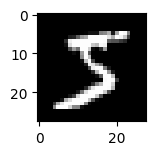

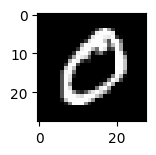

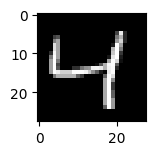

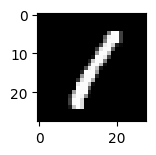

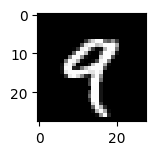

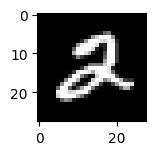

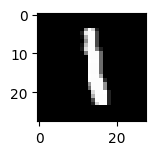

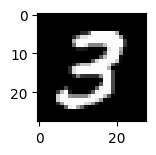

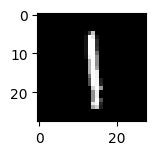

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()

  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [ ]:
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  # return normalized images
  return train_norm, test_norm

In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()

  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):

    # define model
    model = define_model()

    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # stores scores
    scores.append(acc)
    histories.append(history)

  return scores, histories

In [ ]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')

    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()

In [ ]:
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)

  # evaluate model
  scores, histories = evaluate_model(trainX, trainY)

  # learning curves
  summarize_diagnostics(histories)

  # summarize estimated performance
  summarize_performance(scores)

> 98.525
> 98.808
> 98.567
> 98.817
> 98.783


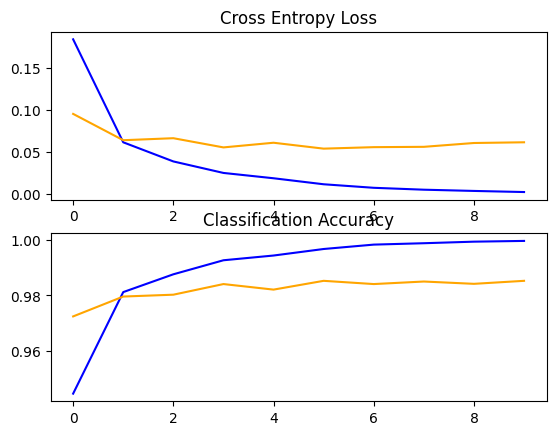

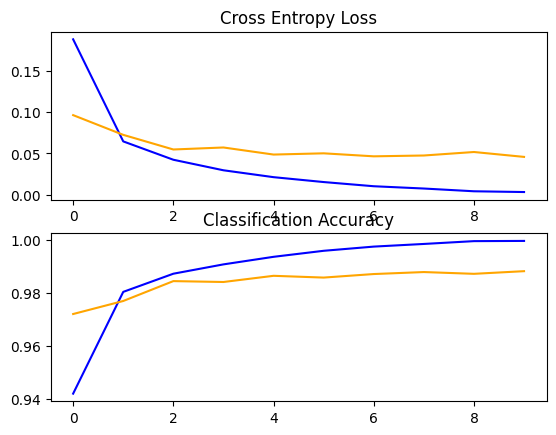

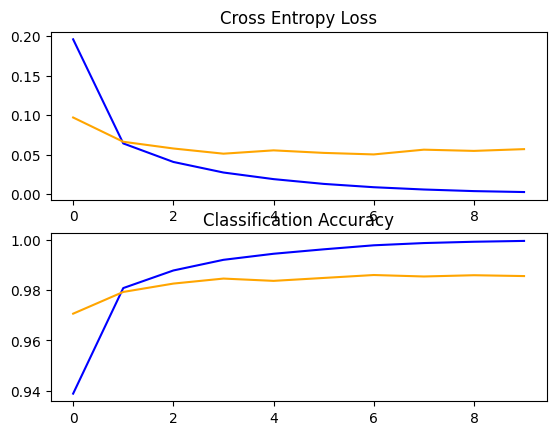

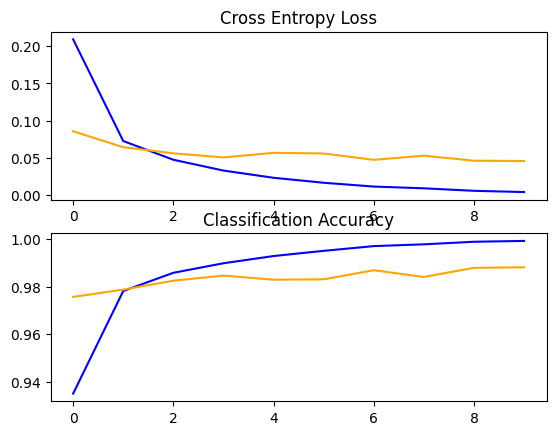

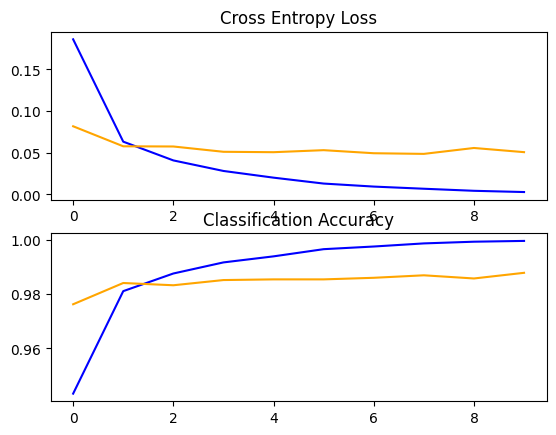

Accuracy: mean=98.700 std=0.127, n=5


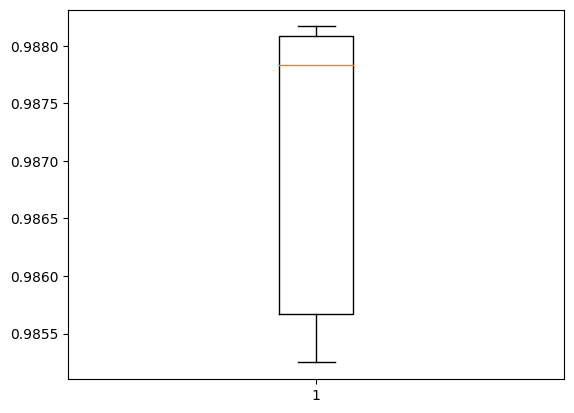

In [ ]:
# entry point, run the test harness
run_test_harness()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness2():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()

  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32)

  # save model
  model.save('final_model.h5')

run_test_harness2()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1635 - accuracy: 0.9500
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0544 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0082 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

import cv2
import os


def load_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img)
    plt.show()

    img = cv2.GaussianBlur(img, (7,7), 0)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 7, 2)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(contour)
        img = img[y:y+h, x:x+w]
    padding_size = max(img.shape) // 3
    img = cv2.copyMakeBorder(img, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # plt.imshow(img)
    # plt.show()

    img_array = img.astype('float32') / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    return img_array

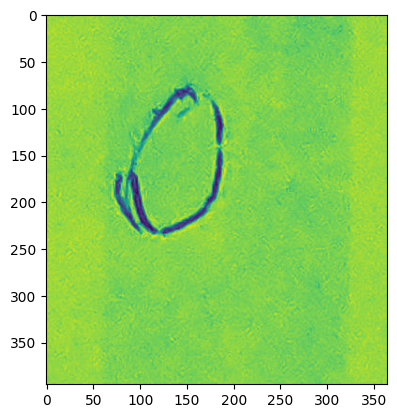

2


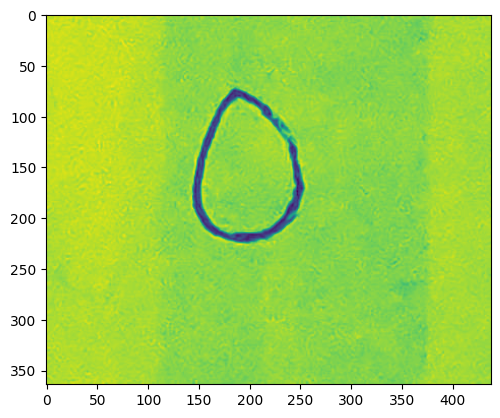

0


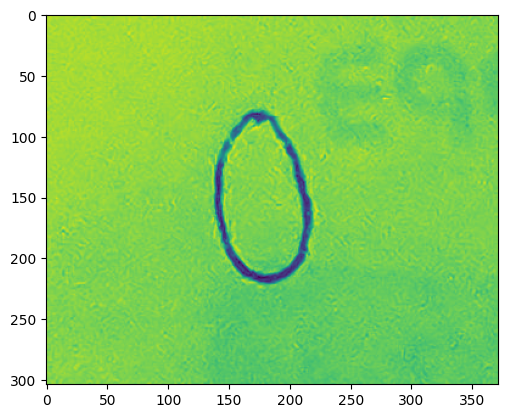

0


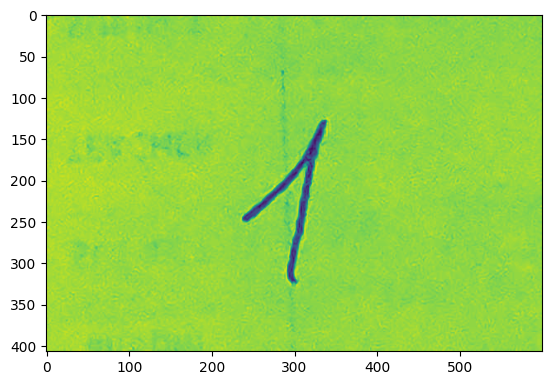

1


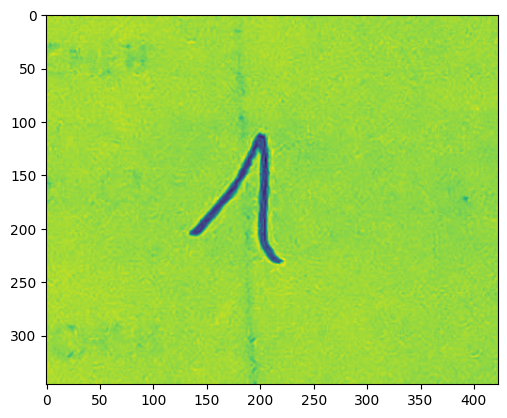

1


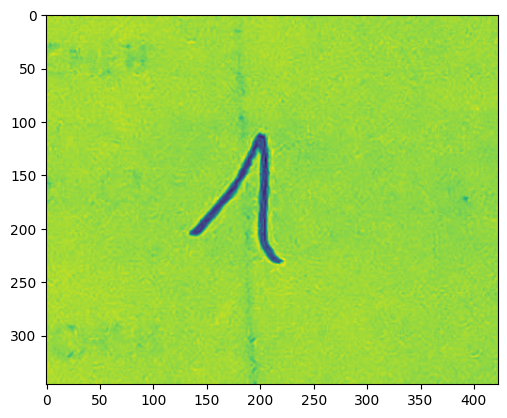

1


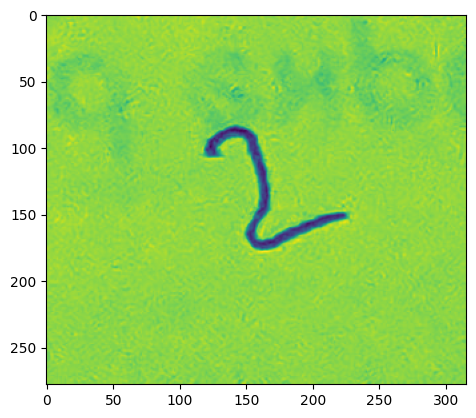

2


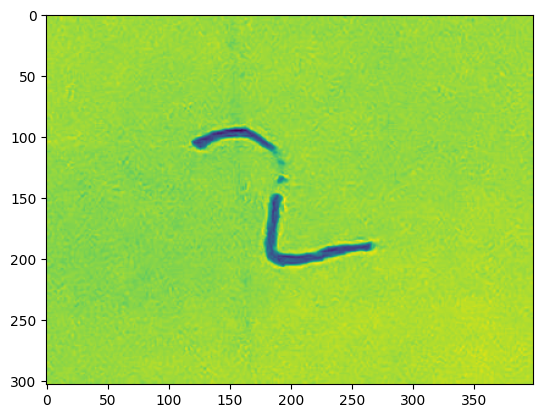

6


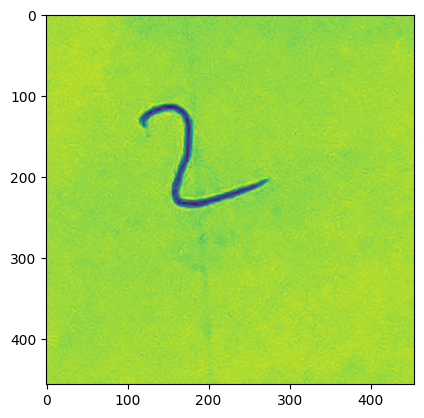

2


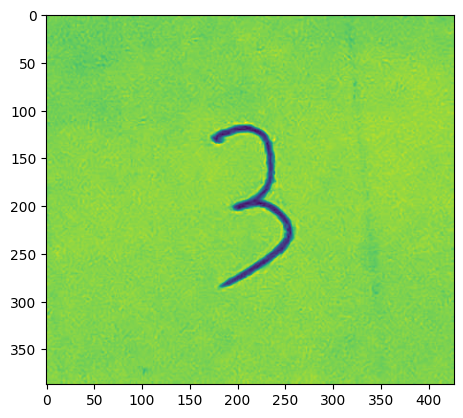

3


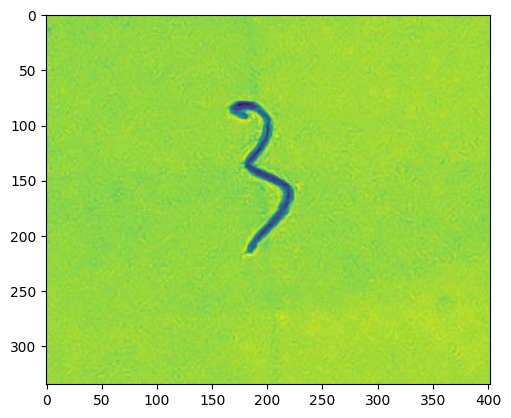

3


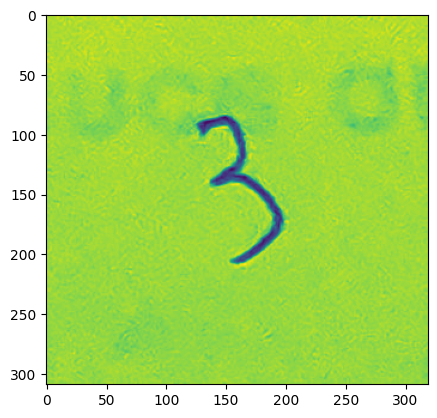

3


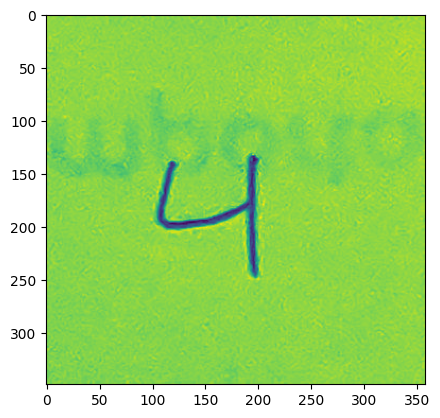

4


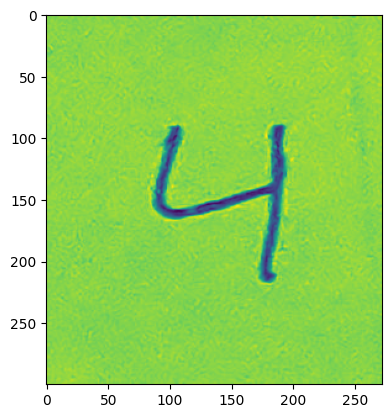

4


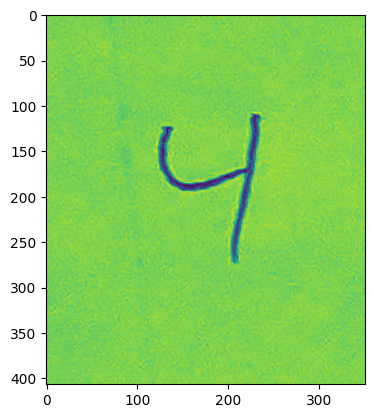

4


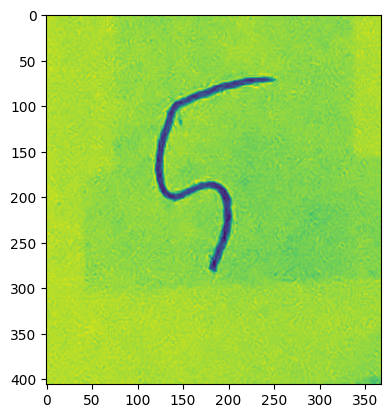

9


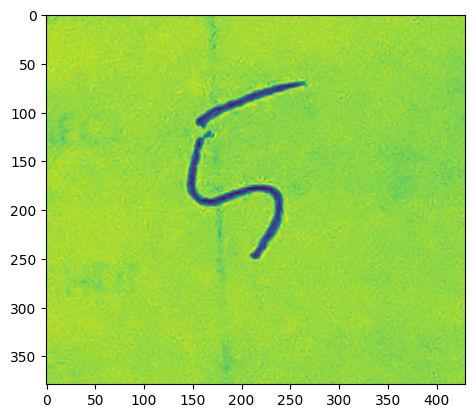

5


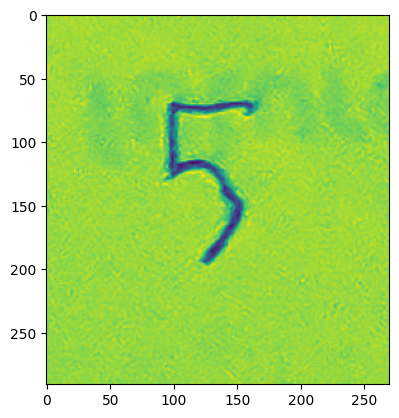

5


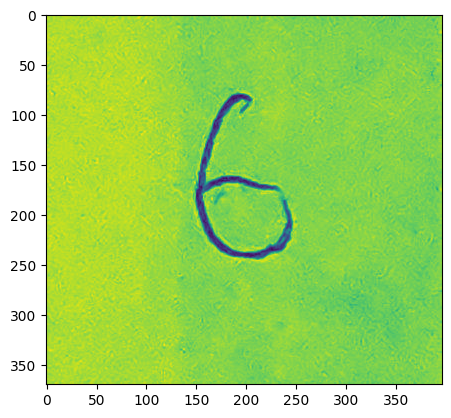

6


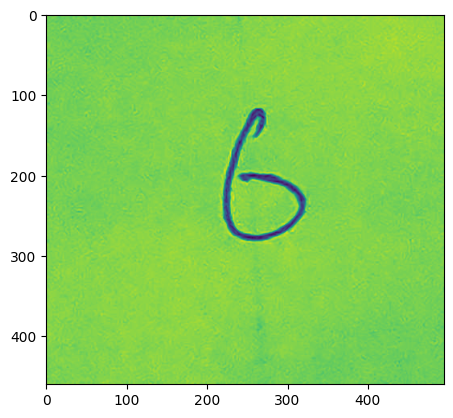

6


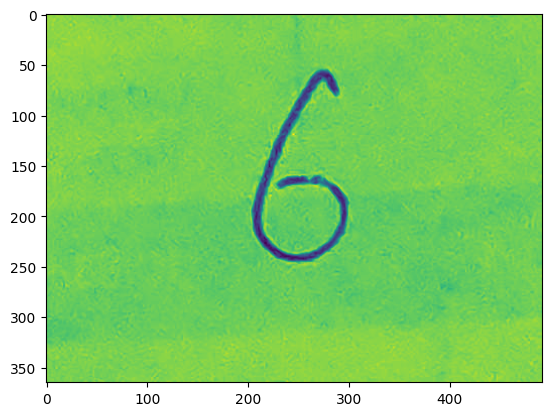

6


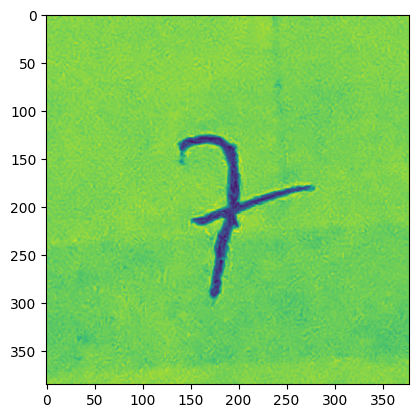

2


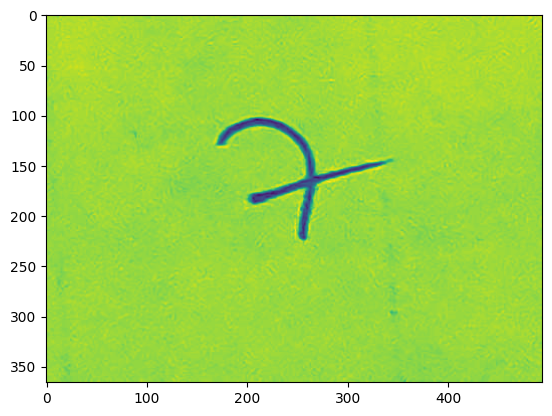

7


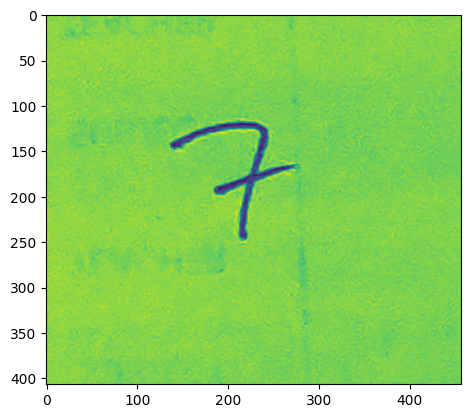

3


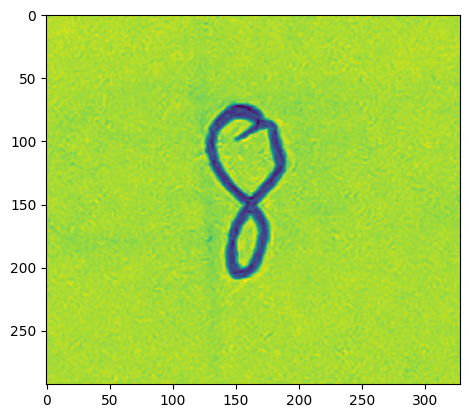

8


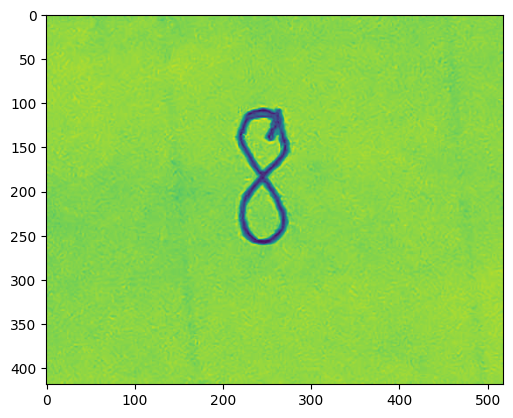

8


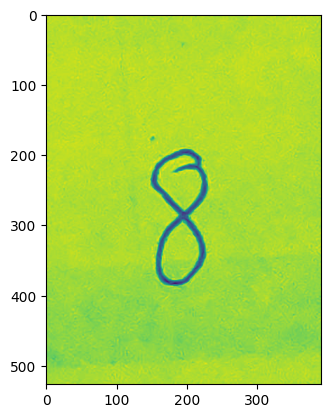

9


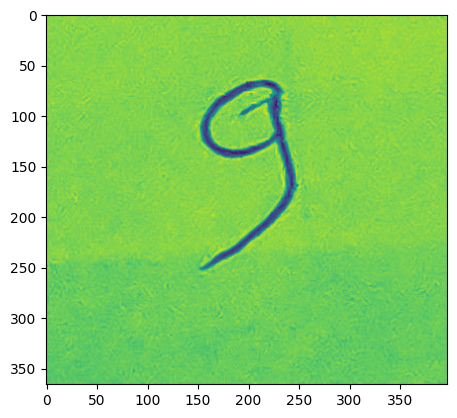

9


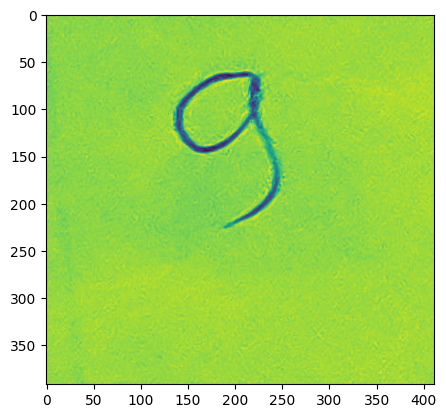

9


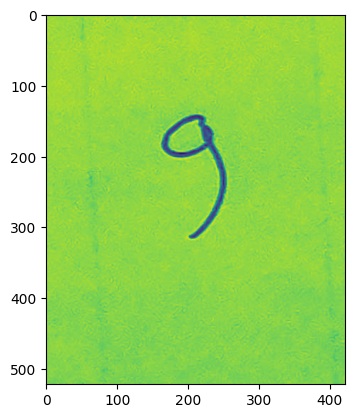

9
Total images: 30, Model Accuracy: 80.00%


In [ ]:
# load an image and predict the class
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
def run_example():
  file_paths = []
  correct = 0
  total_img = 0
  model = load_model('final_model.h5')

  for i in range(10):
    for root, directories, files in os.walk(f'/content/gdrive/MyDrive/21521809/{i}'):
        for filename in files:
            file_path = os.path.join(root, filename)
            img = load_image(file_path)

            predict_value = model.predict(img,verbose=0)

            digit = argmax(predict_value)
            print(digit)

            total_img += 1
            if int(digit) == i:
                correct += 1


  accuracy = correct / total_img if total_img > 0 else 0
  print(f"Total images: {total_img}, Model Accuracy: {accuracy*100:.2f}%")


run_example()